# **Project Name: Hospital Mortality Analysis**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Healthcare Capstone Project_Hospital Mortality Analysis/Hospital Mortality Analysis.csv')
df.sample(10)

,ID,outcome,age,gender,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SPO2
1011,110086,1.0,83,2,21.127530,1,0,0,0,0,0,0,0,0,97.023256,100.000000,49.634146,22.767442,36.569444,92.833333
299,110926,0.0,89,2,32.449177,0,1,0,0,0,1,0,0,0,77.291667,113.478261,60.826087,21.760000,36.344444,97.818182
952,176358,0.0,84,1,30.683735,1,1,0,0,0,0,0,0,0,105.500000,106.652174,64.652174,19.416667,36.018519,96.416667
525,194788,0.0,66,1,37.224490,0,0,0,0,1,0,0,0,0,109.714286,99.448276,58.142857,19.470588,38.365079,99.107143
3,130587,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154
596,183010,0.0,79,2,28.492704,1,1,0,0,0,0,0,0,0,113.826667,106.090909,58.311688,23.493506,37.515152,97.082192
1109,123233,0.0,75,1,27.591837,0,0,1,0,1,1,0,0,0,80.500000,117.000000,70.076923,17.214286,36.646465,99.821429
590,194675,0.0,84,2,30.110279,1,1,1,0,0,0,1,0,0,86.807692,98.300000,62.300000,24.230769,35.972222,96.192308
614,100213,0.0,74,2,26.814570,1,0,0,1,0,1,1,0,0,89.666667,118.363636,59.318182,19.541667,36.129630,93.083333
206,178833,0.0,81,1,NaN,1,0,1,0,1,0,1,0,0,61.823529,136.050000,56.550000,16.888889,36.666667,100.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1177 non-null   int64  
 1   outcome                   1176 non-null   float64
 2   age                       1177 non-null   int64  
 3   gender                    1177 non-null   int64  
 4   BMI                       962 non-null    float64
 5   hypertensive              1177 non-null   int64  
 6   atrialfibrillation        1177 non-null   int64  
 7   CHD with no MI            1177 non-null   int64  
 8   diabetes                  1177 non-null   int64  
 9   deficiencyanemias         1177 non-null   int64  
 10  depression                1177 non-null   int64  
 11  Hyperlipemia              1177 non-null   int64  
 12  Renal failure             1177 non-null   int64  
 13  COPD                      1177 non-null   int64  
 14  heart ra

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1177.0,150778.120646,29034.669513,100213.000000,125603.000000,151901.000000,176048.000000,199952.000000
outcome,1176.0,0.135204,0.342087,0.000000,0.000000,0.000000,0.000000,1.000000
age,1177.0,74.055225,13.434061,19.000000,65.000000,77.000000,85.000000,99.000000
gender,1177.0,1.525064,0.499584,1.000000,1.000000,2.000000,2.000000,2.000000
BMI,962.0,30.188278,9.325997,13.346801,24.326461,28.312474,33.633509,104.970366
hypertensive,1177.0,0.717927,0.450200,0.000000,0.000000,1.000000,1.000000,1.000000
atrialfibrillation,1177.0,0.451147,0.497819,0.000000,0.000000,0.000000,1.000000,1.000000
CHD with no MI,1177.0,0.085811,0.280204,0.000000,0.000000,0.000000,0.000000,1.000000
diabetes,1177.0,0.421410,0.493995,0.000000,0.000000,0.000000,1.000000,1.000000
deficiencyanemias,1177.0,0.338997,0.473570,0.000000,0.000000,0.000000,1.000000,1.000000


<Axes: >

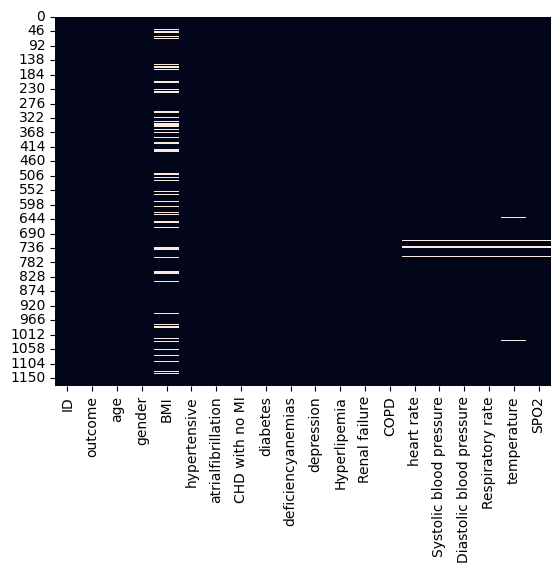

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

# **BMI missing values analysis**

<ipython-input-31-da6a6bd8f56a>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data= BMIdata, palette='viridis')


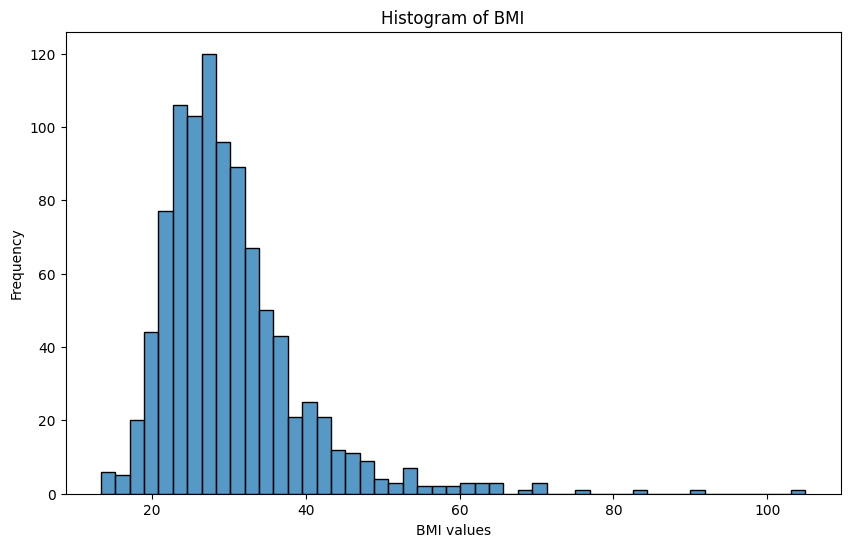

In [ ]:
BMIdata = df['BMI']

plt.figure(figsize=(10, 6))
sns.histplot(data= BMIdata, palette='viridis')

# Add title and labels
plt.title('Histogram of BMI')
plt.xlabel('BMI values')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [ ]:
# Define the bins and labels for BMI categories
bins = [0, 18.5, 25, 30, float('inf')]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity']

# Create a new column 'BMI_category' based on BMI values
df['BMI_category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

In [ ]:
result_df = df.groupby('BMI_category')['age_bins'].value_counts()
result_df

BMI_category   age_bins 
Underweight    (80, 90]      14
               (70, 80]       4
               (60, 70]       2
               (40, 50]       2
               (90, 100]      1
               (50, 60]       1
               (0, 10]        0
               (10, 20]       0
               (30, 40]       0
               (20, 30]       0
Normal weight  (80, 90]     131
               (70, 80]      55
               (60, 70]      33
               (90, 100]     13
               (50, 60]      12
               (40, 50]       6
               (30, 40]       0
               (20, 30]       0
               (10, 20]       0
               (0, 10]        0
Overweight     (80, 90]     111
               (70, 80]      77
               (60, 70]      48
               (50, 60]      28
               (40, 50]      11
               (90, 100]      7
               (30, 40]       6
               (10, 20]       1
               (20, 30]       0
               (0, 10]        0
Obesity        

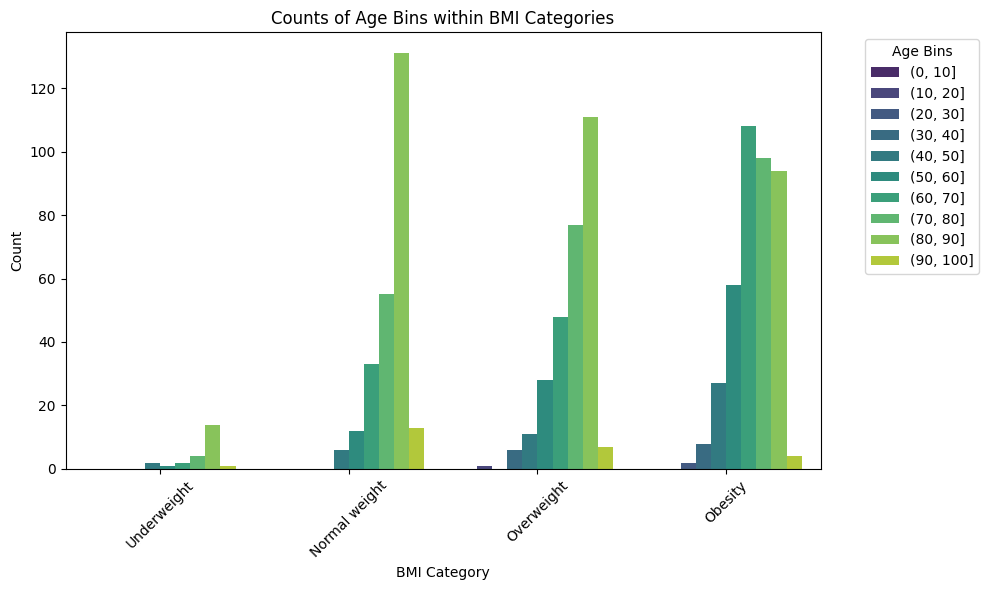

In [ ]:
result_df = df.groupby('BMI_category')['age_bins'].value_counts()

result_df = result_df.reset_index(name='count')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='BMI_category', y='count', hue='age_bins', data=result_df, palette='viridis')

# Add title and labels
plt.title('Counts of Age Bins within BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show plot
plt.legend(title='Age Bins', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
BMI_gender = df.groupby('BMI_category')['gender'].value_counts()
BMI_gender

BMI_category   gender
Underweight    2          18
               1           6
Normal weight  2         127
               1         123
Overweight     1         159
               2         130
Obesity        2         212
               1         187
Name: count, dtype: int64

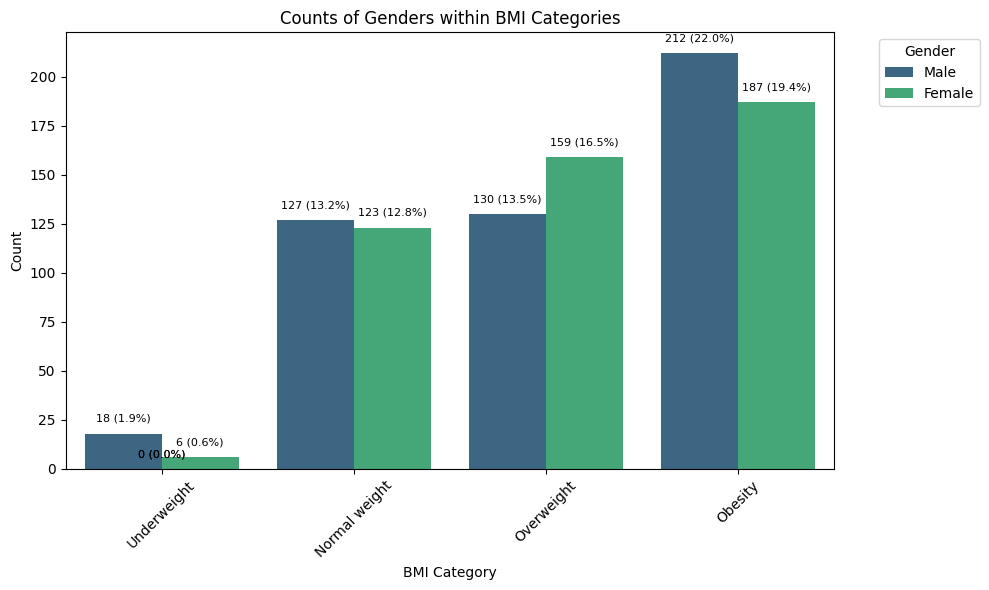

In [ ]:
result = df.groupby('BMI_category')['gender'].value_counts()

# Convert the result to a DataFrame and reset index for easier plotting
result_df = result.reset_index(name='count')

# Map numeric gender values to labels
result_df['gender'] = result_df['gender'].map({1: 'Female', 2: 'Male'})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='BMI_category', y='count', hue='gender', data=result_df, palette='viridis')

# Add data labels with percentages
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 5, f'{height:.0f} ({height / result_df["count"].sum() * 100:.1f}%)', ha='center', va='bottom', fontsize=8)

# Add title and labels
plt.title('Counts of Genders within BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show plot
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Determine the age bins and genders for which the BMI column has missing values

# Filter the DataFrame where 'BMI' column is null
missing_bmi = df[df['BMI'].isnull()]

# Group by 'age_bins' and 'gender' and count the occurrences
missing_bmi_counts = missing_bmi.groupby(['age_bins', 'gender']).size().reset_index(name='count')

# Print the result
missing_bmi_counts = missing_bmi_counts[missing_bmi_counts['count'] != 0]
missing_bmi_counts

,age_bins,gender,count
3,"(10, 20]",2,1
6,"(30, 40]",1,1
7,"(30, 40]",2,1
8,"(40, 50]",1,5
9,"(40, 50]",2,2
10,"(50, 60]",1,5
11,"(50, 60]",2,14
12,"(60, 70]",1,17
13,"(60, 70]",2,16
14,"(70, 80]",1,27


# **Addressing null values in BMI column**

In [ ]:
# Group the DataFrame by age and gender, and calculate the median BMI for each group
median_bmi_by_age_gender = df.groupby(['age', 'gender'])['BMI'].median()


# Function to fill missing BMI values based on age and gender
def fill_missing_bmi(row):
    if pd.isnull(row['BMI']):  # Check if BMI is missing
        # Try to fill missing BMI using median BMI for the corresponding age and gender
        try:
            return median_bmi_by_age_gender[row['age'], row['gender']]
        except KeyError:
            return row['BMI']  # If corresponding median BMI is not available, return NaN
    else:
        return row['BMI']  # If BMI is not missing, return the original value

# Apply the fill_missing_bmi function to fill missing values in the BMI column
df['BMI'] = df.apply(fill_missing_bmi, axis=1)

In [ ]:
df['BMI'].isnull().sum()

2

In [ ]:
df['BMI'].mean()

<ipython-input-4-da6a6bd8f56a>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data= BMIdata, palette='viridis')


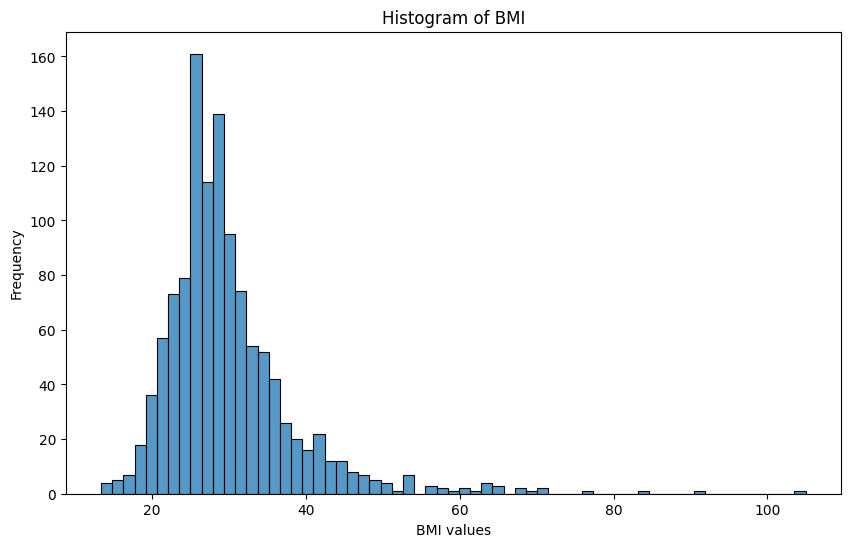

In [ ]:
BMIdata = df['BMI']

plt.figure(figsize=(10, 6))
sns.histplot(data= BMIdata, palette='viridis')

# Add title and labels
plt.title('Histogram of BMI')
plt.xlabel('BMI values')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [ ]:
# Define the bins and labels for BMI categories
bins = [0, 18.5, 25, 30, float('inf')]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity']

# Create a new column 'BMI_category' based on BMI values
df['BMI_category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

# **Analysis of the distribution of mortality rates across different age groups and genders.**

In [ ]:
#Overall mortality rate in percentage

mortality_rate=round((df['outcome'].value_counts()/len(df))*100,2)
mortality_rate

outcome
0.0    86.41
1.0    13.51
Name: count, dtype: float64

### **Distribution of mortality rates across different age groups**

In [ ]:
bins = [0,10,20,30,40,50,60,70,80,90,100]

# Use pd.cut() to bin the 'age' column
df['age_bins'] = pd.cut(df['age'], bins)

# Count the occurrences of each bin in the 'outcome' column
outcome_counts = df.groupby('age_bins')['outcome'].value_counts()

# Calculate the total count for each age bin
total_counts = df.groupby('age_bins')['outcome'].count()

# Divide outcome_counts by total_counts and multiply by 100 to get percentages
outcome_percentages = (outcome_counts / total_counts) * 100
outcome_percentages

age_bins   outcome
(0, 10]    1.0               NaN
           0.0               NaN
(10, 20]   0.0        100.000000
           1.0          0.000000
(20, 30]   1.0         50.000000
           0.0         50.000000
(30, 40]   0.0         93.750000
           1.0          6.250000
(40, 50]   0.0         86.792453
           1.0         13.207547
(50, 60]   0.0         89.830508
           1.0         10.169492
(60, 70]   0.0         90.178571
           1.0          9.821429
(70, 80]   0.0         84.641638
           1.0         15.358362
(80, 90]   0.0         85.487528
           1.0         14.512472
(90, 100]  0.0         74.074074
           1.0         25.925926
dtype: float64

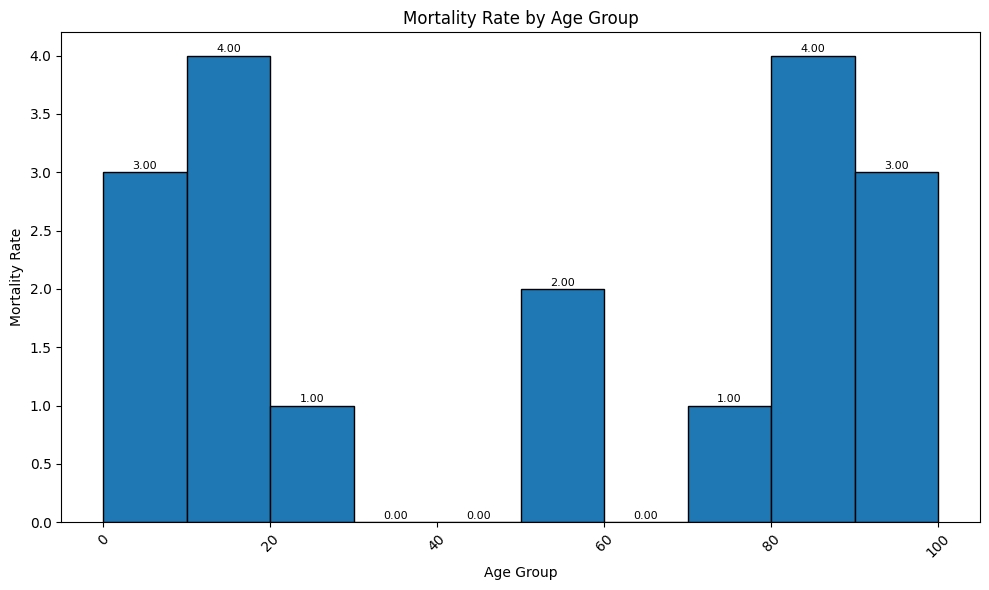

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
outcome_percentages.hist(bins=10, color='tab:blue', edgecolor='black')

# Add data labels
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.01, f'{height:.2f}', ha='center', va='bottom', fontsize=8)

plt.xlabel('Age Group')
plt.ylabel('Mortality Rate')
plt.title('Mortality Rate by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()

In [ ]:
print(outcome_percentages.columns)

RangeIndex(start=0, stop=1, step=1)


### **Distribution of mortality rates across different genders**

In [ ]:
# Count the occurrences of each gender in the 'outcome' column
outcome_counts = df.groupby('gender')['outcome'].value_counts()

# Calculate the total count for each gender
total_counts = df.groupby('gender')['outcome'].count()

# Divide outcome_counts by total_counts and multiply by 100 to get percentages
outcome_percentage = (outcome_counts / total_counts) * 100
round(outcome_percentage,1)

gender  outcome
1       0.0        85.7
        1.0        14.3
2       0.0        87.2
        1.0        12.8
dtype: float64

<Figure size 800x600 with 0 Axes>

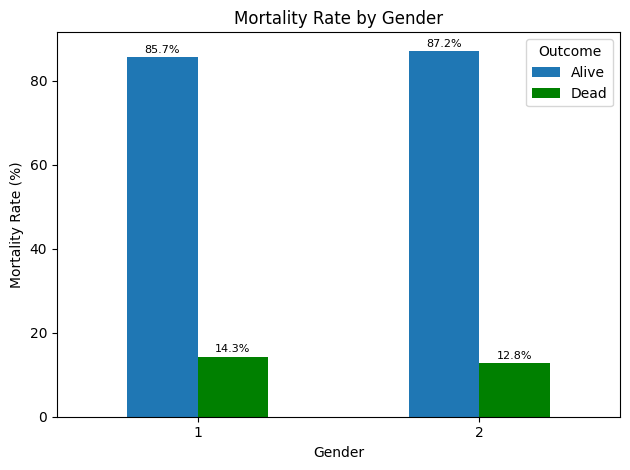

In [ ]:
# Map outcome to mortality (0 = Alive, 1 = Dead)
df['mortality'] = df['outcome'].map({0: 'Alive', 1: 'Dead'})

# Group by gender and calculate mortality rate
mortality_rate_by_gender = df.groupby('gender')['mortality'].value_counts(normalize=True) * 100

# Plotting histogram
plt.figure(figsize=(8, 6))
mortality_rate_by_gender.unstack().plot(kind='bar', stacked=False, color=['tab:blue', 'g'])

# Add data labels
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

plt.xlabel('Gender')
plt.ylabel('Mortality Rate (%)')
plt.title('Mortality Rate by Gender')
plt.xticks(rotation=0)
plt.legend(title='Outcome', labels=['Alive', 'Dead'])
plt.grid(axis='y')
plt.tight_layout()
plt.grid(False)
plt.show()

# **Identifying the age groups with the highest and lowest admission rates.**

In [ ]:
bins = [10,20,30,40,50,60,70,80,90,100]
df['age_bins'] = pd.cut(x = df['age'], bins = bins)

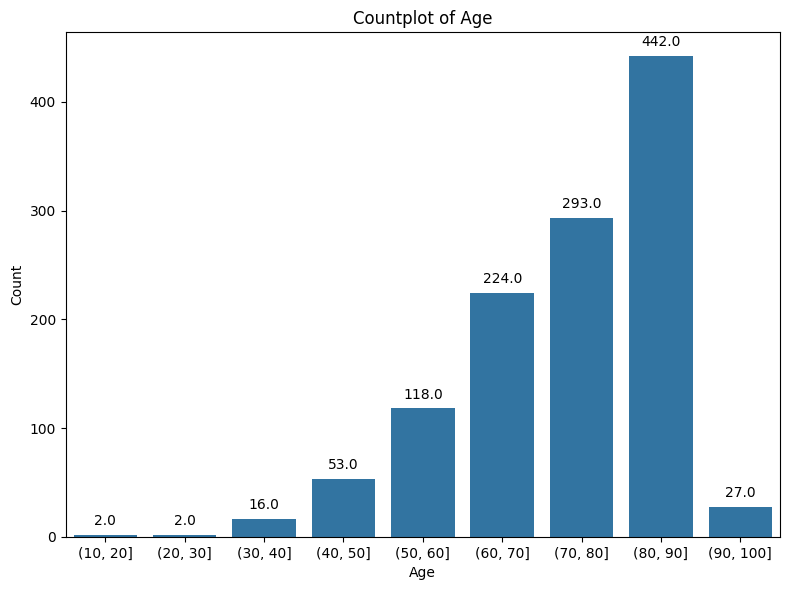

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='age_bins')

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Countplot of Age')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show plot
plt.tight_layout()
plt.show()

# **Calculate the percentage of patients with each medical condition (atrial fibrillation, hypertension, etc.).**

In [ ]:
# Counting the number of patients with each medical condition
medical_conditions = ['hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes',
                      'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure', 'COPD']

condition_counts = {}
total_patients = len(df)

for condition in medical_conditions:
    condition_counts[condition] = df[condition].sum()

# Calculating the percentage of patients with each medical condition
percentage_patients = {}
for condition, count in condition_counts.items():
    percentage_patients[condition] = (count / total_patients) * 100

# Printing the results
for condition, percentage in percentage_patients.items():
    print(f"Percentage of patients with {condition}: {percentage:.2f}%")


Percentage of patients with hypertensive: 71.79%
Percentage of patients with atrialfibrillation: 45.11%
Percentage of patients with CHD with no MI: 8.58%
Percentage of patients with diabetes: 42.14%
Percentage of patients with deficiencyanemias: 33.90%
Percentage of patients with depression: 11.89%
Percentage of patients with Hyperlipemia: 37.98%
Percentage of patients with Renal failure: 36.53%
Percentage of patients with COPD: 7.56%


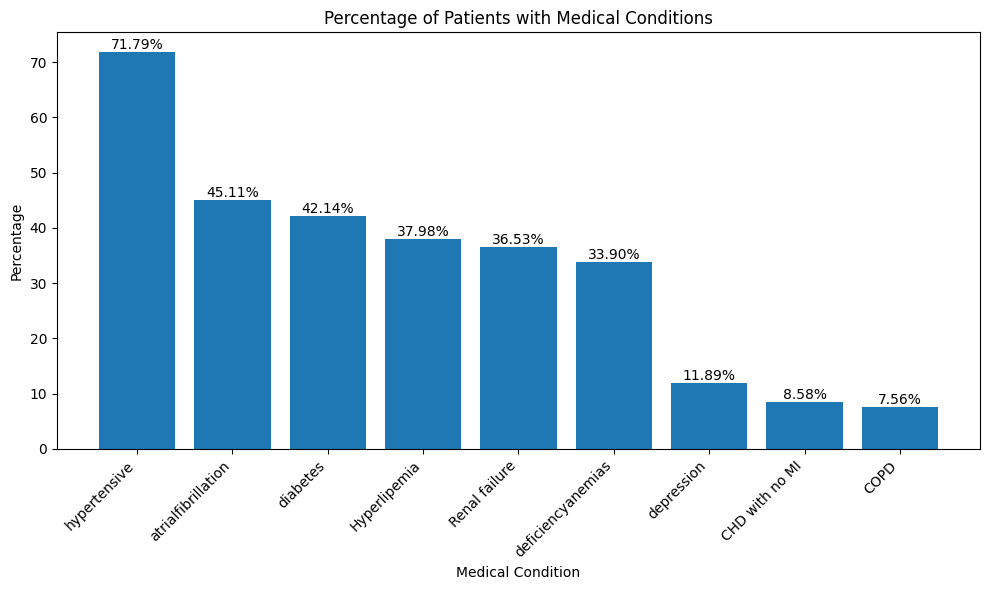

In [ ]:
# Convert percentage_patients dictionary to DataFrame for easy plotting
percentage_df = pd.DataFrame(list(percentage_patients.items()), columns=['Condition', 'Percentage'])

# Sorting the DataFrame by percentage in descending order
percentage_df = percentage_df.sort_values(by='Percentage', ascending=False)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(percentage_df['Condition'], percentage_df['Percentage'], color='tab:blue')

# Adding data labels
for i, percentage in enumerate(percentage_df['Percentage']):
    plt.text(i, percentage + 0.5, f"{percentage:.2f}%", ha='center')

# Adding titles and labels
plt.title('Percentage of Patients with Medical Conditions')
plt.xlabel('Medical Condition')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')

# Removing gridlines
plt.grid(False)

# Displaying the plot
plt.tight_layout()
plt.show()


## **Analysis of certain conditions co-occur more frequently.**

In [ ]:
# Create a contingency table
co_occurrence_table = pd.crosstab(df['diabetes'], df['Renal failure'])

# Print the contingency table
print(co_occurrence_table)

# Calculate the co-occurrence frequency
co_occurrence_frequency = co_occurrence_table.loc[1, 1] / df.shape[0]

# Print the co-occurrence frequency
print(f"Co-occurrence frequency of diabetes and renal failure: {co_occurrence_frequency:.2%}")

Renal failure    0    1
diabetes               
0              485  196
1              262  234
Co-occurrence frequency of diabetes and renal failure: 19.88%


In [ ]:
# Define the list of conditions
conditions = ['hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
              'depression', 'Hyperlipemia', 'Renal failure', 'COPD']

# Create a new column representing the combination of conditions for each patient
df['condition_combination'] = df[conditions].apply(lambda row: ','.join(row.astype(str)), axis=1)

# Calculate the frequency of each combination of conditions
condition_combination_counts = df['condition_combination'].value_counts()

# Calculate the total number of rows in the DataFrame
total_rows = len(df)

# Calculate the frequency of each combination of conditions as percentages
condition_combination_percentages = (condition_combination_counts / total_rows) * 100

# Display the top combinations with counts in percentages
print("Top combinations of conditions with counts in percentages:")
print(round(condition_combination_percentages.head(10),2))

Top combinations of conditions with counts in percentages:
condition_combination
0,0,0,0,0,0,0,0,0    4.76
1,0,0,0,0,0,0,0,0    4.59
1,1,0,0,0,0,0,0,0    4.50
1,1,0,0,0,0,1,0,0    2.80
0,1,0,0,0,0,0,0,0    2.72
1,0,0,0,0,0,1,0,0    2.29
1,0,0,1,0,0,1,0,0    2.29
1,0,0,1,0,0,0,0,0    2.21
1,1,0,1,0,0,1,1,0    2.21
1,0,0,1,0,0,0,1,0    2.21
Name: count, dtype: float64


In [ ]:
print(round(condition_combination_percentages.tail(15),2))

condition_combination
0,1,1,0,0,1,1,0,0    0.08
1,1,0,1,0,1,0,0,0    0.08
1,1,0,1,0,0,1,0,1    0.08
0,1,1,0,1,0,1,0,0    0.08
0,0,0,0,1,0,0,1,1    0.08
0,0,1,1,1,1,0,1,0    0.08
1,1,0,0,1,1,1,1,0    0.08
1,0,0,1,0,1,1,1,0    0.08
0,0,0,1,0,0,0,1,0    0.08
0,0,0,0,0,0,0,0,1    0.08
0,0,1,0,1,0,0,1,0    0.08
1,0,1,1,0,1,0,1,0    0.08
0,0,0,0,1,1,0,1,1    0.08
1,1,1,1,0,1,0,1,0    0.08
0,0,1,1,1,1,1,1,0    0.08
Name: count, dtype: float64


# **Analysis of the distribution of vital signs (heart rate, blood pressure, respiratory rate, SPO2) for both alive and deceased patients.**

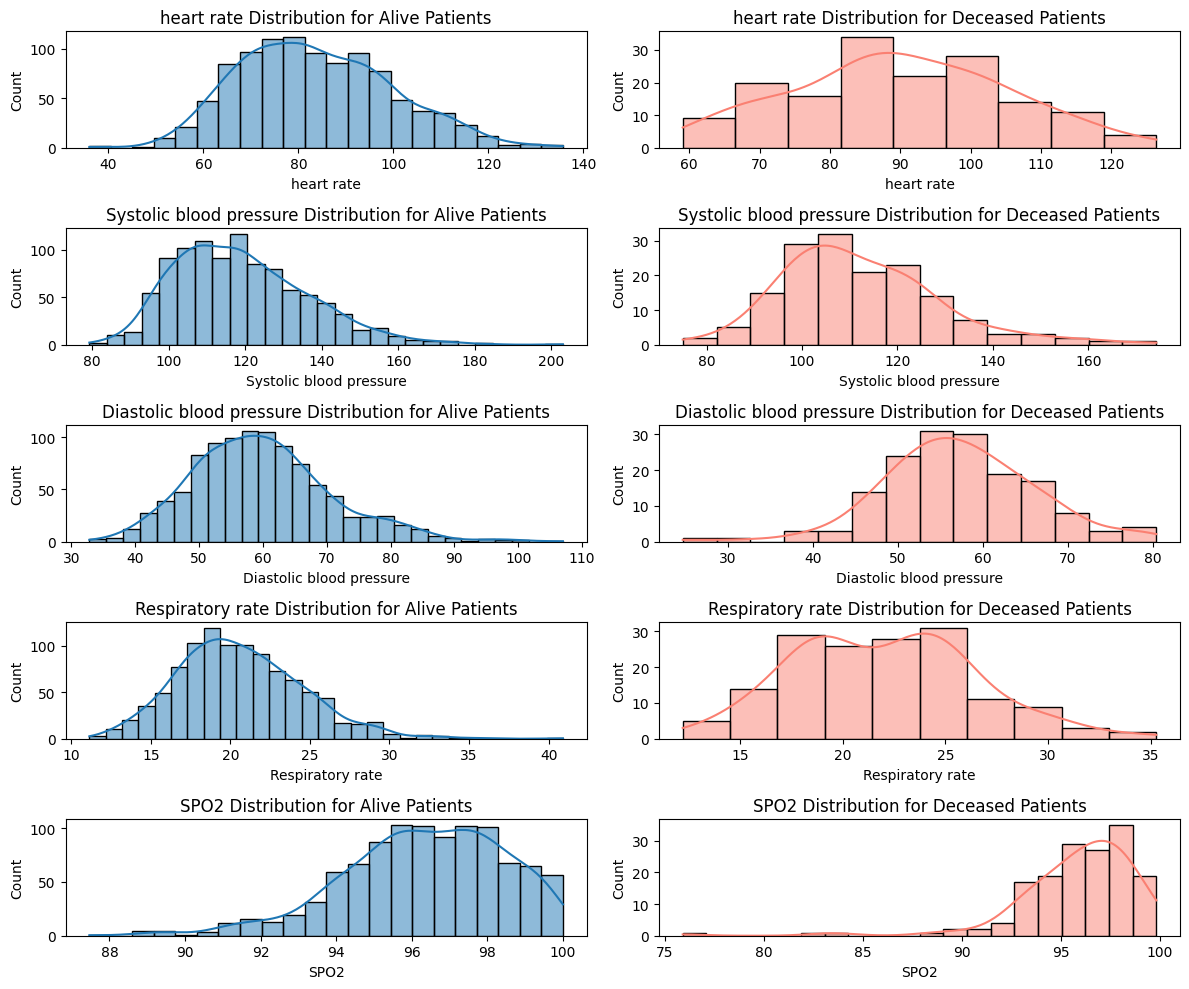

In [ ]:
# Select columns for analysis
vital_signs = ['heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Respiratory rate', 'SPO2']
outcome_labels = {0.0: 'Alive', 1.0: 'Deceased'}

# Set up subplots
fig, axes = plt.subplots(nrows=len(vital_signs), ncols=2, figsize=(12, 2*len(vital_signs)), sharex=False)

# Iterate through vital signs
for i, vital_sign in enumerate(vital_signs):
    # Plot histogram for alive patients
    sns.histplot(data=df[df['outcome'] == 0.0], x=vital_sign, ax=axes[i, 0], color='tab:blue', kde=True)
    axes[i, 0].set_title(f'{vital_sign} Distribution for Alive Patients')

    # Plot histogram for deceased patients
    sns.histplot(data=df[df['outcome'] == 1.0], x=vital_sign, ax=axes[i, 1], color='salmon', kde=True)
    axes[i, 1].set_title(f'{vital_sign} Distribution for Deceased Patients')

# Adjust layout
plt.tight_layout()
plt.show()

# **Identify abnormal ranges of vital signs associated with higher mortality (e.g., very high or low blood pressure)**

In [ ]:
# Calculate summary statistics for vital signs
summary_stats = df.groupby('outcome').agg({
    'heart rate': ['mean', 'min', 'max'],
    'Systolic blood pressure': ['mean', 'min', 'max'],
    'Diastolic blood pressure': ['mean', 'min', 'max'],
    'Respiratory rate': ['mean', 'min', 'max'],
    'temperature': ['mean', 'min', 'max'],
    'SPO2': ['mean', 'min', 'max']
})

summary_stats.T

outcome                               0.0         1.0
heart rate               mean   83.752512   89.818102
                         min    36.000000   59.083333
                         max   135.708333  126.379310
Systolic blood pressure  mean  118.910443  112.183936
                         min    79.230769   75.000000
                         max   203.000000  174.244898
Diastolic blood pressure mean   59.904987   57.182586
                         min    32.807692   24.736842
                         max   107.000000   80.391304
Respiratory rate         mean   20.615958   21.982945
                         min    11.137931   12.212121
                         max    40.900000   35.266667
temperature              mean   36.699702   36.535412
                         min    34.324074   33.250000
                         max    39.132478   38.250000
SPO2                     mean   96.337705   95.860282
                         min    87.468750   75.916667
                         max   100.000000   99.821429

**Normal range for heart rate : 60-100 bpm**

**Normal range for Respiratory rate : 12-20 bpm**

**Normal range for Temperature : 36.1°C to 37.2°C**

**Normal range for SPO2 : 95%-100%**

# **Identify patients with significantly higher or lower values for each vital sign compared to the normal ranges. Analyze how these outliers relate to mortality outcomes (e.g., how many patients with lower SPO2 values died?)**

In [ ]:
# Calculate z-scores for each vital sign
vital_signs = ['heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SPO2']
for vital_sign in vital_signs:
    df[f'{vital_sign}_zscore'] = (df[vital_sign] - df[vital_sign].mean()) / df[vital_sign].std()

# Identify outliers (z-score > 3 or z-score < -3)
outliers = pd.DataFrame()
for vital_sign in vital_signs:
    high_outliers = df[df[f'{vital_sign}_zscore'] > 3]
    low_outliers = df[df[f'{vital_sign}_zscore'] < -3]
    outliers = pd.concat([outliers, high_outliers, low_outliers])

# Analyze mortality outcomes for outliers
mortality_outcomes = outliers.groupby('outcome').size()
print("Mortality outcomes for outliers:")
print(mortality_outcomes)

Mortality outcomes for outliers:
outcome
0.0    39
1.0    13
dtype: int64


In [ ]:

# Conditions to compare
conditions = ['hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure', 'COPD']

# Create contingency tables for each condition
contingency_tables = {}
for condition in conditions:
    contingency_table = pd.crosstab(df['outcome'], df[condition])
    contingency_tables[condition] = contingency_table

# Perform chi-square test for each condition
results = {}
for condition, table in contingency_tables.items():
    chi2, p, dof, expected = chi2_contingency(table)
    results[condition] = {'chi2': chi2, 'p-value': p, 'degrees_of_freedom': dof, 'expected_frequencies': expected}

# Display results
for condition, result in results.items():
    print(f"Condition: {condition}")
    print(f"Chi-square: {result['chi2']}")
    print(f"P-value: {result['p-value']}")
    print(f"Degrees of Freedom: {result['degrees_of_freedom']}")
    print("Expected frequencies:")
    print(result['expected_frequencies'])
    print()

Condition: hypertensive
Chi-square: 5.709632394157746
P-value: 0.016872072128495594
Degrees of Freedom: 1
Expected frequencies:
[[287.1122449 729.8877551]
 [ 44.8877551 114.1122449]]

Condition: atrialfibrillation
Chi-square: 11.404453910696295
P-value: 0.0007326823478390708
Degrees of Freedom: 1
Expected frequencies:
[[557.79336735 459.20663265]
 [ 87.20663265  71.79336735]]

Condition: CHD with no MI
Chi-square: 0.12370815218183187
P-value: 0.7250469871114291
Degrees of Freedom: 1
Expected frequencies:
[[929.65561224  87.34438776]
 [145.34438776  13.65561224]]

Condition: diabetes
Chi-square: 2.6509914591956347
P-value: 0.1034853346882827
Degrees of Freedom: 1
Expected frequencies:
[[588.92602041 428.07397959]
 [ 92.07397959  66.92602041]]

Condition: deficiencyanemias
Chi-square: 11.039122749750124
P-value: 0.0008920906517918712
Degrees of Freedom: 1
Expected frequencies:
[[671.94642857 345.05357143]
 [105.05357143  53.94642857]]

Condition: depression
Chi-square: 3.8267201581277366

# **Insights:**

•	Most common BMI is 30

•	Most of the males are Obese

•	Mortality rate amongst 90 to 100 age group is the most.

•	Males have better mortality rate then female

•	There are the greatest number of patients in the age range of 80 to 90 years.

•	Most common medical condition is hypertension.

•	Co-occurrence frequency of diabetes and renal failure is 19.88%

•	Mean heart rate lies in the range of 83-89 bpm

•	Mean respiratory rate lies in the range of 20-21 bpm
